# 🧼 Data Preprocessing Techniques

Este notebook revisa técnicas esenciales de **preprocesamiento de datos**, una etapa clave en cualquier proyecto de ciencia de datos o aprendizaje automático.

> El objetivo es preparar los datos para que los modelos de machine learning funcionen de forma eficiente y precisa.


# Datos de ejemplo

## 1. Importación de librerías

In [1]:
# Importación de librerias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer # Para completar missing values

## 2. Carga de datos de ejemplo

In [2]:
# Creamos un DataFrame de ejemplo (muy simple)
data = pd.DataFrame({
    'Edad': [25, 27, np.nan, 35, 29],
    'Salario': [50000, 54000, 58000, np.nan, 62000],
    'Ciudad': ['Madrid', 'Barcelona', 'Madrid', 'Valencia', np.nan]
})

data

,Edad,Salario,Ciudad
0,25.0,50000.0,Madrid
1,27.0,54000.0,Barcelona
2,NaN,58000.0,Madrid
3,35.0,NaN,Valencia
4,29.0,62000.0,NaN


## 3. Manejo de valores faltantes

Los valores faltantes pueden sesgar resultados o hacer que los modelos no funcionen. Existen varias estrategias:
- Eliminar filas/columnas con muchos valores faltantes
- Imputar (rellenar) con la media, mediana, moda, o valores específicos


In [3]:
# Únicamente los campos numéricos (luego veremos que hacer con las variables categóricas)
imputer = SimpleImputer(strategy='mean')
data[['Edad', 'Salario']] = imputer.fit_transform(data[['Edad', 'Salario']])
data

,Edad,Salario,Ciudad
0,25.0,50000.0,Madrid
1,27.0,54000.0,Barcelona
2,29.0,58000.0,Madrid
3,35.0,56000.0,Valencia
4,29.0,62000.0,NaN


## 4. Codificación de variables categóricas

No osbtante, los modelos no pueden trabajar con texto. Las variables categóricas deben transformarse en números.
- Label Encoding: cambiamos cada clase por valores numéricos entre 0 y el número de clases -1
- One-Hot Encoding: generamos tantos campos como valores distintos


In [4]:
# Solo aplica a la columna "Ciudad"
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Por defecto viene 'comprimido'
encoded = encoder.fit_transform(data[['Ciudad']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Ciudad']))

# Cambiamos la columna en el dataset original
data = data.drop('Ciudad', axis=1)
data = pd.concat([data, encoded_df], axis=1)
data

,Edad,Salario,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Valencia,Ciudad_nan
0,25.0,50000.0,0.0,1.0,0.0,0.0
1,27.0,54000.0,1.0,0.0,0.0,0.0
2,29.0,58000.0,0.0,1.0,0.0,0.0
3,35.0,56000.0,0.0,0.0,1.0,0.0
4,29.0,62000.0,0.0,0.0,0.0,1.0


## 5. Escalado de características numéricas

Muchas técnicas de ML se ven afectadas por la escala de los datos (por ejemplo, KNN o regresión logística). Por ello, es conveniente escalar las variables numéricas, las dos formas más comunes son:

- `StandardScaler`: media 0, varianza 1
- `MinMaxScaler`: valores entre 0 y 1


In [5]:
scaler = StandardScaler()
data[['Edad', 'Salario']] = scaler.fit_transform(data[['Edad', 'Salario']])
data

,Edad,Salario,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Valencia,Ciudad_nan
0,-1.195229,-1.5,0.0,1.0,0.0,0.0
1,-0.597614,-0.5,1.0,0.0,0.0,0.0
2,0.000000,0.5,0.0,1.0,0.0,0.0
3,1.792843,0.0,0.0,0.0,1.0,0.0
4,0.000000,1.5,0.0,0.0,0.0,1.0


# Data Preprocessing Techniques with Real Data

A continuación seguiremos los mismos pasos en un dataset real. Para ello, usaremos el dataset de pasajeros del Titanic, que contiene datos como edad, clase social, género, etc...

> El objetivo es aplicar transformaciones necesarias para que los modelos de ML puedan entender y procesar la información correctamente.


In [6]:
# Librerías para manipulación de datos y visualización
import pandas as pd
import numpy as np
import seaborn as sns  # para cargar dataset y visualizar
import matplotlib.pyplot as plt

# Funciones para preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
# Cargamos el dataset del Titanic desde seaborn (datasets disponibles: https://github.com/mwaskom/seaborn-data)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# Estudiamos las dimensiones y tipos
print("Dimensiones: ",df.shape)
print("Tipos de datos: \n",df.dtypes)

# Vemos cuántos valores faltantes hay por columna
df.isnull().sum()

Dimensiones:  (891, 15)
Tipos de datos: 
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


> Vemos que hay columnas con muchos valores faltantes, como `deck`, y otras con algunos, como `age` y `embarked`.


In [9]:
# A. Separamos variables numéricas y categóricas

# Cogemos las columnas más útiles o de interés
df_model = df[['survived', 'pclass', 'sex', 'age', 'embarked']].copy()

# Identificamos variables numéricas y categóricas
numerical_features = ['age']
categorical_features = ['pclass', 'sex', 'embarked']

In [10]:
# B. Definimos transformaciones para cada tipo de dato (requieren tratamientos distintos)
# En esta ocasión y por limpieza, aplicaremos las transformaciones al mismo tiempo mediante la función sklearn.pipeline

# Imputación de valores numéricos + escalado
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # reemplaza nulos por mediana
    ('scaler', StandardScaler())                    # estandariza la escala
])

# Imputación + one-hot encoding para categóricas
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   # modo (valor más común)
    ('encoder', OneHotEncoder(handle_unknown='ignore'))     # one-hot para texto
])

In [11]:
# C. Combinamos todo con la función sklearn.compose

# Aplicamos transformaciones diferentes a cada tipo de columna
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [12]:
# Aplicamos el preprocesamiento al dataset
X = df_model.drop('survived', axis=1)
y = df_model['survived'] # Esta es la variable objetivo, sobre la cual no le vamos a aplicar transformaciones

X_preprocessed = preprocessor.fit_transform(X)

# Convertimos el resultado a DataFrame para visualizar
X_preprocessed_df = pd.DataFrame(
    X_preprocessed.toarray() if hasattr(X_preprocessed, 'toarray') else X_preprocessed,
    columns=preprocessor.get_feature_names_out()
)

X_preprocessed_df.head()

,num__age,cat__pclass_1,cat__pclass_2,cat__pclass_3,cat__sex_female,cat__sex_male,cat__embarked_C,cat__embarked_Q,cat__embarked_S
0,-0.565736,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.663861,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.258337,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.433312,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.433312,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### ✅ Resumen (del ejemplo del Titanic):

- Cómo cargar datos reales con valores faltantes y tipos mixtos
- Cómo construir pipelines de preprocesamiento con `scikit-learn`
- La importancia de separar transformaciones para numéricos y categóricos
- Aplicar `ColumnTransformer` para organizar el flujo de limpieza

Este tipo de flujo es muy común en pipelines reales, sobre todo al trabajar con `sklearn`, `MLFlow` o producción.


# (ANEXO) Exploratory Data Analysis (EDA)

Antes de cualquier transformación o modelado, es fundamental entender el dataset: su estructura, patrones, valores extremos, datos faltantes, y distribuciones.

Por ello, continuaremos con un analisis más profundo del dataset:

1. Información general del dataset
2. Análisis de valores faltantes
3. Estadísticas básicas
4. Distribución de variables
5. Correlaciones y relaciones clave


In [13]:
# 1. Info general del dataset

# Número de filas y columnas
print(f"Dimensiones: {df.shape}")

# Info completa: Columnas, tipos de datos y número no nulos
df.info()

Dimensiones: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


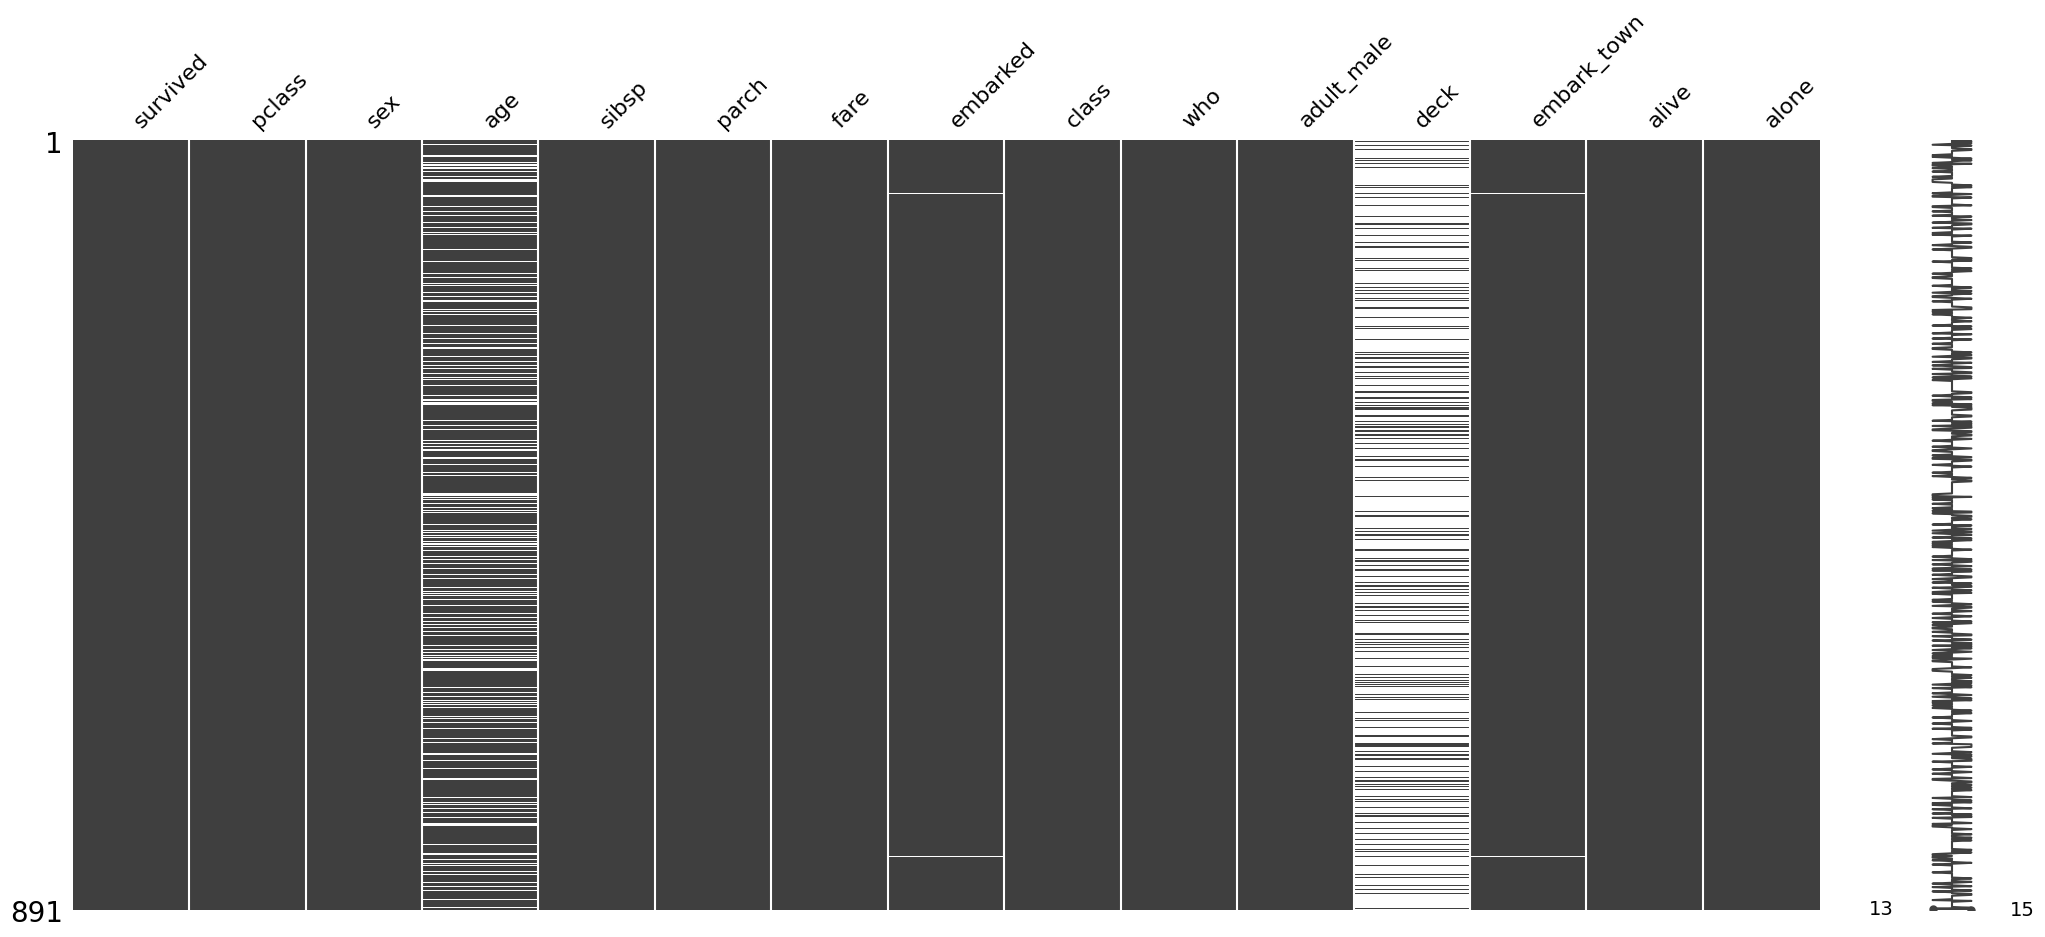

In [14]:
# 2. Valores faltantes visuales

import missingno as msno # Librería específica para valores faltantes

# Visualización rápida de nulos
msno.matrix(df)

# Total de valores nulos por columna (ordenados)
df.isnull().sum().sort_values(ascending=False)

In [15]:
# 3. Estadísticas básicas por tipo de variable

# Variables numéricas
# Muestra: conteo, media, desvest, min, max y cuartiles
df.describe() # Por defecto muestra las variables int y float

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Variables categóricas
# Muestra: conteo, valores únicos, valor más frecuente, frec máx
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


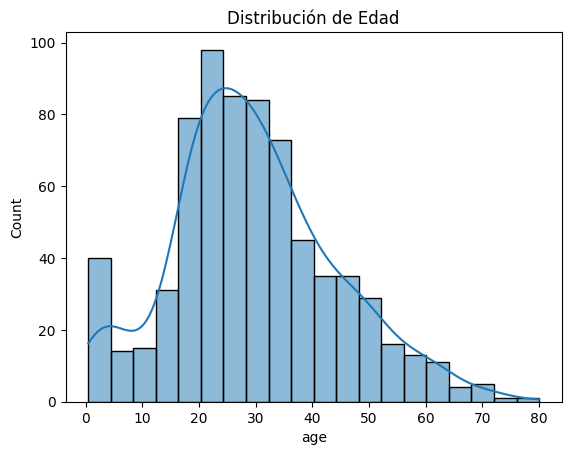

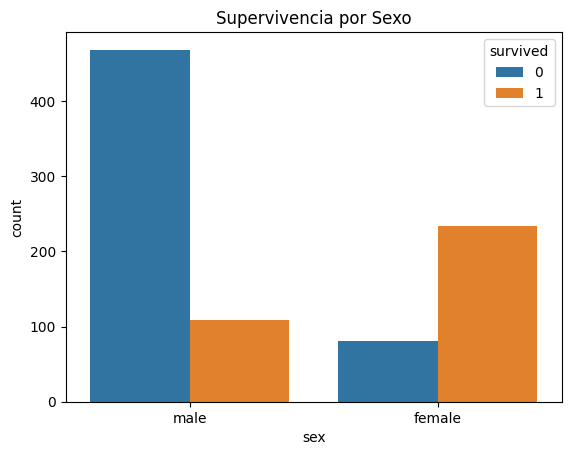

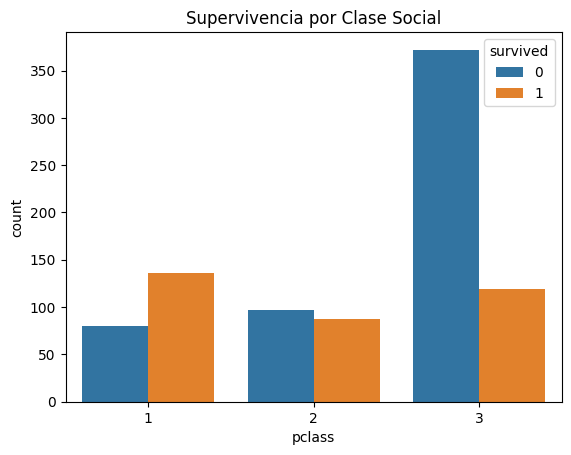

In [17]:
# 4. Distribuciones importantes (dataset del Titanic)

# Distribución de la edad como histógrama (muestra la distribución de una variable)
sns.histplot(df['age'], kde=True) # kde: añade línea suavizada
plt.title('Distribución de Edad')
plt.show()

# Supervivencia por sexo (muestra la frecuencia en función de una variable 'hue')
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Supervivencia por Sexo')
plt.show()

# Distribución de clases y supervivencia
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Supervivencia por Clase Social')
plt.show()

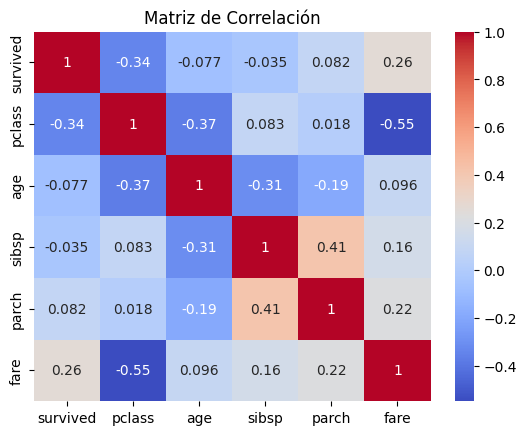

In [18]:
# 5. Correlaciones entre variables numéricas

# Matriz de correlación
correlation = df.select_dtypes(include='number').corr()

# Mapa de calor de las correlaciones
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

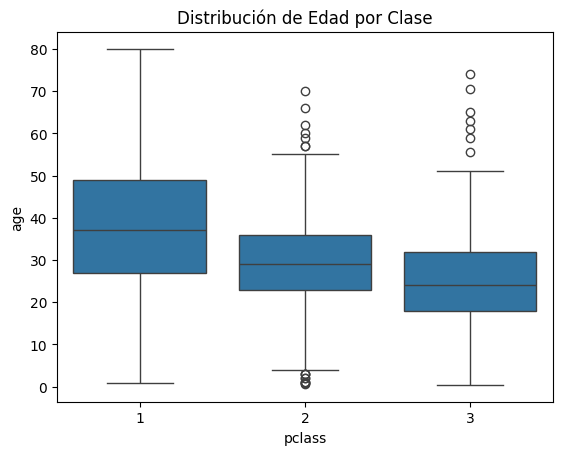

In [19]:
# 6. Otras opciones de sns son:
# Boxplots para ver outliers por grupo
# Pairplots para ver relaciones entre múltiples variables
# Violin plots para ver conjuntamente la distribución + densidad
# Funciones: pivot_table() para sacar tablas dinámicas entre las variables
# value_counts()	para mostrar frecuencias por categorías


# Boxplot: edad por clase
sns.boxplot(data=df, x='pclass', y='age')
plt.title('Distribución de Edad por Clase')
plt.show()